In [155]:
import pandas as pd

In [156]:
import re

In [157]:
from sklearn.impute import KNNImputer

In [158]:
import time
import datetime

Подгрузка первого файла

In [159]:
data = pd.read_excel('строки 2020 до июля 2021_без ФИО.xlsx')

/usr/lib/python3/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [160]:
data

,Фамилия,карта №,ФИО пациента,Возраст,Дата рождения,Диагноз,"Диагноз, строка",Продолжительность бесплодия,Дата пункции,Дата переноса,...,MEDECINS_ID,Своевременность,Пол,Рост,Вес.1,Вид клин.бер,Срок родов,Возраст СМ,MOTCONSU_ID_Исхода,Осложнения во время беременности
0,Савина,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 14:49:43,...,613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 15:06:26,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.02.2020 12:15:36,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407760.0,NaN
3,Кирсанов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.10.2020 09:54:12,...,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.01.2021 10:51:06,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,Исакова,97330омс,NaN,38.0,21.07.1982,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,18.0,NaN,22.05.2021 11:28:25,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463763.0,NaN
2966,NaN,NaN,NaN,NaN,NaN,фактор.N97.4_x000D_\n.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2967,Исакова,97729,NaN,36.0,28.02.1985,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,NaN,28.04.2021 11:30:00,28.05.2021 15:20:00,...,360.0,преждевременные,мальчик,30.0,1732.0,NaN,28-32,NaN,464505.0,NaN
2968,Исакова,97729,NaN,36.0,28.02.1985,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,NaN,28.04.2021 11:30:00,28.05.2021 15:20:00,...,360.0,преждевременные,мальчик,30.0,1732.0,NaN,28-32,NaN,464505.0,NaN


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 99 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Фамилия                                        2453 non-null   object 
 1   карта №                                        2446 non-null   object 
 2   ФИО пациента                                   0 non-null      float64
 3   Возраст                                        2446 non-null   float64
 4   Дата рождения                                  2446 non-null   object 
 5   Диагноз                                        2838 non-null   object 
 6   Диагноз, строка                                2323 non-null   object 
 7   Продолжительность бесплодия                    1823 non-null   float64
 8   Дата пункции                                   2402 non-null   object 
 9   Дата переноса                                  2453 

In [162]:
data['сперма, полученная хир путем разморож'].value_counts()

Пункционная биопсия придатков, яичков,_x000D_\nаспирационная (PESA, TESЕ)    6
Name: сперма, полученная хир путем разморож, dtype: int64

In [163]:
data['Сперма, полученная хир путем свежая'].value_counts()

Пункционная биопсия придатков, яичков,_x000D_\nаспирационная (PESA, TESЕ)    35
Открытая биопсия яичек, придатков MECA,_x000D_\nTECE                          5
Микрохирургическая экстракция_x000D_\nсперматозоидов из яичек                 4
Name: Сперма, полученная хир путем свежая, dtype: int64

In [164]:
data['Криоперенос'].value_counts()

1.0    1313
0.0    1140
Name: Криоперенос, dtype: int64

In [165]:
data = data[~data['Фамилия'].isnull()]

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 0 to 2969
Data columns (total 99 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Фамилия                                        2453 non-null   object 
 1   карта №                                        2446 non-null   object 
 2   ФИО пациента                                   0 non-null      float64
 3   Возраст                                        2446 non-null   float64
 4   Дата рождения                                  2446 non-null   object 
 5   Диагноз                                        2323 non-null   object 
 6   Диагноз, строка                                2323 non-null   object 
 7   Продолжительность бесплодия                    1823 non-null   float64
 8   Дата пункции                                   2402 non-null   object 
 9   Дата переноса                                  2453 

In [167]:
data = data.drop(columns = ['ФИО пациента','ФИО супруга'])

In [168]:
data['MOTCONSU_ID_Исхода'].value_counts()

447800.0    2
448647.0    2
452822.0    2
452758.0    2
457568.0    2
           ..
461579.0    1
461642.0    1
461560.0    1
461379.0    1
469029.0    1
Name: MOTCONSU_ID_Исхода, Length: 1836, dtype: int64

<AxesSubplot:>

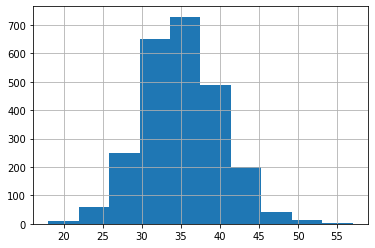

In [169]:
data['Возраст'].hist()

In [170]:
data.columns

Index(['Фамилия', 'карта №', 'Возраст', 'Дата рождения', 'Диагноз',
       'Диагноз, строка', 'Продолжительность бесплодия', 'Дата пункции',
       'Дата переноса', 'Номер попытки', 'Рост женщины', 'Вес женщины',
       'ИМТ женщины', 'Вид протокола', 'Гонадотропины', 'Стартовая доза',
       'Триггер', 'Продол-ть ОС', 'День цикла пункция', 'День цикла перенос',
       'Пунктировано', 'Промыто', 'Ооцитов', 'кол-во М II',
       'Толщина эндометрия мм', 'Эмбриолог перенос', 'Время культ.', 'ПГД',
       'Метод ПГД', 'ЭКО', 'ИКСИ', 'DATA_PMT_ART17_ID',
       'Ссылка на исходную запись протокола',
       'Ссылка на предыдущую запись протокола', 'КриооцитыПациентки',
       'ДО крио', 'ДО свеж', 'ДС', 'ДЕ после ПГД', 'MOTCONSU_ID', 'ДЕ без ПГД',
       'КРИОсперма', 'Сперма свежая', 'сперма, полученная хир путем разморож',
       'Сперма, полученная хир путем свежая', 'Криоперенос', 'КолПер',
       'Объём эякулята (мл)', 'Концентрация круглых клеток',
       'Концентрация сперматозойдов 

In [171]:
data = data.drop(columns = ['Дата рождения'])

In [172]:
data = data.rename(columns={"Фамилия": "doctor", "карта №": "id", "Возраст": "age", 'Диагноз': 'w_diagnosis',
       'Диагноз, строка': 'w_diagnosis_mkb', 'Продолжительность бесплодия' : 'duration_of_infertility', 'Дата пункции': 'egg_collection_day_time',
       'Дата переноса': 'date_of_embryo_transfer', 
        'Номер попытки' : 'number_of_eco-tries', 'Рост женщины' : 'w_height', 'Вес женщины': 'w_weight',
       'ИМТ женщины' : 'w_bmi'})

In [173]:
data.head(20)

,doctor,id,age,w_diagnosis,w_diagnosis_mkb,duration_of_infertility,egg_collection_day_time,date_of_embryo_transfer,number_of_eco-tries,w_height,...,MEDECINS_ID,Своевременность,Пол,Рост,Вес.1,Вид клин.бер,Срок родов,Возраст СМ,MOTCONSU_ID_Исхода,Осложнения во время беременности
0,Савина,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 14:49:43,NaN,NaN,...,613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 15:06:26,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,26.02.2020 12:15:36,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407760.0,NaN
3,Кирсанов,NaN,NaN,NaN,NaN,NaN,NaN,08.10.2020 09:54:12,NaN,NaN,...,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,23.01.2021 10:51:06,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,25.02.2021 08:00:00,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Самойлович,NaN,NaN,NaN,NaN,NaN,NaN,09.06.2021 13:09:48,NaN,NaN,...,582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466702.0,NaN
7,Васильева,73373,41.0,NaN,NaN,NaN,30.12.2019 09:00:00,04.01.2020 12:29:02,1.0,167.0,...,362.0,своевременные,мальчик,52.0,3112.0,NaN,37-41,NaN,399700.0,NaN
8,Исакова,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,10.01.2020 15:15:00,1.0,160.0,...,360.0,своевременные,мальчик,51.0,3500.0,NaN,37-41,NaN,400119.0,NaN
9,Исакова,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,10.01.2020 15:15:00,1.0,160.0,...,360.0,своевременные,мальчик,51.0,3500.0,NaN,37-41,NaN,400119.0,NaN


In [174]:
data['Вид протокола'].value_counts()

АНТ    1897
КП      111
ДЛ       93
СО       85
КЛЦ      45
ЗГТ      17
ЕЦ       12
МЕЦ       3
СДЛ       1
Name: Вид протокола, dtype: int64

In [175]:
data['Ссылка на исходную запись протокола'].value_counts()

129607.0    2
278224.0    2
139469.0    2
295229.0    2
295232.0    2
           ..
309630.0    1
309603.0    1
309319.0    1
309609.0    1
317202.0    1
Name: Ссылка на исходную запись протокола, Length: 2440, dtype: int64

In [176]:
data = data.drop(columns = ['DATA_PMT_ART17_ID',
       'Ссылка на исходную запись протокола',
       'Ссылка на предыдущую запись протокола'])

In [177]:
data = data.rename(columns={'Вид протокола':'protocol', 'Гонадотропины': 'gonadotropins', 'Стартовая доза': 'starting_dose ',
       'Триггер': 'trigger', 'Продол-ть ОС' : 'duration_of_ovarian_stimulation ', 'День цикла пункция': 'cycle_day_puncture', 
        'День цикла перенос': 'cycle_day_transfer',
       'Пунктировано':'punctuated', 'Промыто':'flushed', 'Ооцитов': 'num_oocytes', 'кол-во М II': 'mature_oocytes',
       'Толщина эндометрия мм':'endometrial_thickness_mm', 'Эмбриолог перенос': 'embryologist', 'Время культ.' : 'num_of_cultivation_hours', 
        'ПГД': 'embryo_biopsy',
       'Метод ПГД': 'method_embryo_biopsy', 'ЭКО': 'ECO', 'ИКСИ': 'sperm_injection', 'КриооцитыПациентки': 'own_frozen_oocytes'})

In [178]:
data.head()

,doctor,id,age,w_diagnosis,w_diagnosis_mkb,duration_of_infertility,egg_collection_day_time,date_of_embryo_transfer,number_of_eco-tries,w_height,...,MEDECINS_ID,Своевременность,Пол,Рост,Вес.1,Вид клин.бер,Срок родов,Возраст СМ,MOTCONSU_ID_Исхода,Осложнения во время беременности
0,Савина,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 14:49:43,NaN,NaN,...,613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,18.02.2020 15:06:26,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,26.02.2020 12:15:36,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407760.0,NaN
3,Кирсанов,NaN,NaN,NaN,NaN,NaN,NaN,08.10.2020 09:54:12,NaN,NaN,...,361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Исакова,NaN,NaN,NaN,NaN,NaN,NaN,23.01.2021 10:51:06,NaN,NaN,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
data = data.drop(columns = ['MOTCONSU_ID'])

In [180]:
data = data.rename(columns={ 'ДО крио':'crio_donor_oocytes', 'ДО свеж':'fresh_donor_oocytes', 'ДС': 'donor_sperm',
                            'ДЕ после ПГД' : 'donor_embryos_after_testing', 'ДЕ без ПГД' : 'donor_embryos_without_testing',
       'КРИОсперма': 'crio_sperm', 'Сперма свежая': 'fresh_sperm', 'сперма, полученная хир путем разморож': 'crio_sperm_obtained_surgery',
       'Сперма, полученная хир путем свежая': 'fresh_sperm_obtained_surgery', 
        'Криоперенос': 'thawed_embryos', 'КолПер': 'num_embryos_transferred',
       'Объём эякулята (мл)': 'ejaculate_volume_ml', 'Концентрация круглых клеток': 'concen_of_round_cells',
       'Концентрация сперматозойдов (млн на мл)': 'concen_sperm_cells',
       'Подвижность сперматозойдов (A+B) (%)': 'mobility_of_sperm_%', 'Нормальные формы (%)': 'norm_sperm_%',
       'Морфологические аномальные в нативном образце': 'anomal_sperm_%'})

In [181]:
data = data[~data['id'].isnull()]

In [182]:
data.id.nunique()

1448

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   doctor                                2446 non-null   object 
 1   id                                    2446 non-null   object 
 2   age                                   2446 non-null   float64
 3   w_diagnosis                           2323 non-null   object 
 4   w_diagnosis_mkb                       2323 non-null   object 
 5   duration_of_infertility               1823 non-null   float64
 6   egg_collection_day_time               2402 non-null   object 
 7   date_of_embryo_transfer               2446 non-null   object 
 8   number_of_eco-tries                   2385 non-null   float64
 9   w_height                              2446 non-null   float64
 10  w_weight                              2437 non-null   float64
 11  w_bmi            

In [185]:
data.columns

Index(['doctor', 'id', 'age', 'w_diagnosis', 'w_diagnosis_mkb',
       'duration_of_infertility', 'egg_collection_day_time',
       'date_of_embryo_transfer', 'number_of_eco-tries', 'w_height',
       'w_weight', 'w_bmi', 'protocol', 'gonadotropins', 'starting_dose ',
       'trigger', 'duration_of_ovarian_stimulation ', 'cycle_day_puncture',
       'cycle_day_transfer', 'punctuated', 'flushed', 'num_oocytes',
       'mature_oocytes', 'endometrial_thickness_mm', 'embryologist',
       'num_of_cultivation_hours', 'embryo_biopsy', 'method_embryo_biopsy',
       'ECO', 'sperm_injection', 'own_frozen_oocytes', 'crio_donor_oocytes',
       'fresh_donor_oocytes', 'donor_sperm', 'donor_embryos_after_testing',
       'donor_embryos_without_testing', 'crio_sperm', 'fresh_sperm',
       'crio_sperm_obtained_surgery', 'fresh_sperm_obtained_surgery',
       'thawed_embryos', 'num_embryos_transferred', 'ejaculate_volume_ml',
       'concen_of_round_cells', 'concen_sperm_cells', 'mobility_of_sperm_%

In [186]:
data['Вид прот.перенос']

7        ЕЦ
8       NaN
9       NaN
10      NaN
12      NaN
       ... 
2963     ЕЦ
2965     ЕЦ
2967    ЗГТ
2968    ЗГТ
2969    NaN
Name: Вид прот.перенос, Length: 2446, dtype: object

In [187]:
data = data.drop(columns = ['Событие, к которому относится запись', 'Дата записи', 'Грэйд',
                           'ИсхDATA_PMT_ART17_ID', 'MOTCONSU_ID_Исхода', 'Возраст супруга'])

In [188]:
data = data.rename(columns={'Нормальные формы расчет': 'normal_sperm_by_embryologist', 'Нормальные формы Пред': 'normal_sperm_by_biologists',
                            'GR1': 'gr1', 'GR1-2' : 'gr1_2',
       'GR2': 'gr2', 'GR2-3': 'gr2_3', 'GR3': 'gr3',
         'КолЗам': 'num_crio_embrions', 'ПовтЗам': 'refreezing_embrions', 'Номер эмбриона': 'embryo_number',
       'СМ': 'surrogate_mother', 'Исход лечения': 'outcome_treatment', 'Количество плодов': 'num_of_fetuses', 'Исход беременности': 'outcome_pregnancy',
       'Возраст мужчины': 'm_age', 'МАР - тест (lgG)': 'МАР_lgG', 'Рост М': 'm_height', 'Вес': 'm_weight', 'Алкоголь': 'm_alcho',
       'лечение варикоцеле': 'm_varicocele', 'ЗППП': 'm_STDs', 'крипторхизм': 'm_cryptorchidism', 'простатит': 'm_prostatitis','Код': 'health_insurance',
       'МАР-тест': 'MAP_test', 'карта супруга': 'm_id',
       'Название процедуры': 'procedure_name', 'Стимуляция': 'stimulation', 'Вид прот.перенос': 'protocol_before_transfer',
       'Своевременность': 'timeliness_of_delivery', 'Пол': 'fetal_sex', 'Рост': 'fetal_height', 'Вес.1': 'fetal_weight', 'Вид клин.бер': 'localization_of_pregnancy',
        'Срок родов': 'due_date',
       'Возраст СМ': 'age_surrogate_mother', 'Осложнения во время беременности': 'complications_during_pregnancy'})

In [189]:
data.head()

,doctor,id,age,w_diagnosis,w_diagnosis_mkb,duration_of_infertility,egg_collection_day_time,date_of_embryo_transfer,number_of_eco-tries,w_height,...,protocol_before_transfer,MEDECINS_ID,timeliness_of_delivery,fetal_sex,fetal_height,fetal_weight,localization_of_pregnancy,due_date,age_surrogate_mother,complications_during_pregnancy
7,Васильева,73373,41.0,NaN,NaN,NaN,30.12.2019 09:00:00,04.01.2020 12:29:02,1.0,167.0,...,ЕЦ,362.0,своевременные,мальчик,52.0,3112.0,NaN,37-41,NaN,NaN
8,Исакова,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,10.01.2020 15:15:00,1.0,160.0,...,NaN,360.0,своевременные,мальчик,51.0,3500.0,NaN,37-41,NaN,NaN
9,Исакова,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,10.01.2020 15:15:00,1.0,160.0,...,NaN,360.0,своевременные,мальчик,51.0,3500.0,NaN,37-41,NaN,NaN
10,Исакова,88248,46.0,Бесплодие II._x000D_\nХронический_x000D_\nсаль...,Бесплодие II. Хронический_x000D_\nсальпингоофо...,2.0,08.01.2020 10:30:00,13.01.2020 15:00:00,1.0,149.0,...,NaN,360.0,NaN,NaN,NaN,NaN,Выкидыш,NaN,NaN,NaN
12,Исакова,86497,33.0,Бесплодие_x000D_\nII.Фолликуля_x000D_\nрная ки...,Бесплодие II.Фолликулярная киста правого_x000D...,NaN,09.01.2020 10:00:00,13.01.2020 12:21:23,1.0,168.0,...,NaN,360.0,NaN,NaN,NaN,NaN,Неразвиваю_x000D_\nщаяся,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Исакова,97330омс,38.0,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,18.0,NaN,22.05.2021 11:28:25,2.0,165.0,...,ЕЦ,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2965,Исакова,97330омс,38.0,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,18.0,NaN,22.05.2021 11:28:25,2.0,165.0,...,ЕЦ,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2967,Исакова,97729,36.0,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,NaN,28.04.2021 11:30:00,28.05.2021 15:20:00,1.0,160.0,...,ЗГТ,360.0,преждевременные,мальчик,30.0,1732.0,NaN,28-32,NaN,NaN
2968,Исакова,97729,36.0,Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...,Бесплодие I.Хронический_x000D_\nсальпингоофори...,NaN,28.04.2021 11:30:00,28.05.2021 15:20:00,1.0,160.0,...,ЗГТ,360.0,преждевременные,мальчик,30.0,1732.0,NaN,28-32,NaN,NaN


In [190]:
data.age_surrogate_mother = data.age_surrogate_mother.fillna(0)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   doctor                            2446 non-null   object 
 1   id                                2446 non-null   object 
 2   age                               2446 non-null   float64
 3   w_diagnosis                       2323 non-null   object 
 4   w_diagnosis_mkb                   2323 non-null   object 
 5   duration_of_infertility           1823 non-null   float64
 6   egg_collection_day_time           2402 non-null   object 
 7   date_of_embryo_transfer           2446 non-null   object 
 8   number_of_eco-tries               2385 non-null   float64
 9   w_height                          2446 non-null   float64
 10  w_weight                          2437 non-null   float64
 11  w_bmi                             2446 non-null   float64
 12  protoc

Создание списка с названиями столбцов, в которых все значения заполнены
Создание списка с названиями столбцов, в которых не все значения заполнены

In [192]:
list_of_unnull = []

In [193]:
list_of_null = []

In [194]:
for name in data.columns:
    if getattr(data, name).isnull().any(axis=0) == False:
        list_of_unnull.append(name)
    else:
        list_of_null.append(name)
    

In [195]:
list_of_unnull

['doctor',
 'id',
 'age',
 'date_of_embryo_transfer',
 'w_height',
 'w_bmi',
 'mature_oocytes',
 'num_of_cultivation_hours',
 'embryo_biopsy',
 'ECO',
 'sperm_injection',
 'own_frozen_oocytes',
 'crio_donor_oocytes',
 'fresh_donor_oocytes',
 'donor_sperm',
 'donor_embryos_after_testing',
 'donor_embryos_without_testing',
 'crio_sperm',
 'fresh_sperm',
 'thawed_embryos',
 'num_embryos_transferred',
 'normal_sperm_by_embryologist',
 'gr1',
 'gr1_2',
 'gr2',
 'gr2_3',
 'gr3',
 'num_crio_embrions',
 'refreezing_embrions',
 'embryo_number',
 'surrogate_mother',
 'm_alcho',
 'm_varicocele',
 'm_STDs',
 'm_cryptorchidism',
 'm_prostatitis',
 'procedure_name',
 'stimulation',
 'MEDECINS_ID',
 'age_surrogate_mother']

In [196]:
list_of_null

['w_diagnosis',
 'w_diagnosis_mkb',
 'duration_of_infertility',
 'egg_collection_day_time',
 'number_of_eco-tries',
 'w_weight',
 'protocol',
 'gonadotropins',
 'starting_dose ',
 'trigger',
 'duration_of_ovarian_stimulation ',
 'cycle_day_puncture',
 'cycle_day_transfer',
 'punctuated',
 'flushed',
 'num_oocytes',
 'endometrial_thickness_mm',
 'embryologist',
 'method_embryo_biopsy',
 'crio_sperm_obtained_surgery',
 'fresh_sperm_obtained_surgery',
 'ejaculate_volume_ml',
 'concen_of_round_cells',
 'concen_sperm_cells',
 'mobility_of_sperm_%',
 'norm_sperm_%',
 'anomal_sperm_%',
 'normal_sperm_by_biologists',
 'outcome_treatment',
 'num_of_fetuses',
 'outcome_pregnancy',
 'm_age',
 'МАР_lgG',
 'm_height',
 'm_weight',
 'health_insurance',
 'MAP_test',
 'm_id',
 'protocol_before_transfer',
 'timeliness_of_delivery',
 'fetal_sex',
 'fetal_height',
 'fetal_weight',
 'localization_of_pregnancy',
 'due_date',
 'complications_during_pregnancy']

In [197]:
one_change = list_of_unnull + ['w_weight']

In [198]:
data[one_change].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doctor                         2446 non-null   object 
 1   id                             2446 non-null   object 
 2   age                            2446 non-null   float64
 3   date_of_embryo_transfer        2446 non-null   object 
 4   w_height                       2446 non-null   float64
 5   w_bmi                          2446 non-null   float64
 6   mature_oocytes                 2446 non-null   float64
 7   num_of_cultivation_hours       2446 non-null   float64
 8   embryo_biopsy                  2446 non-null   float64
 9   ECO                            2446 non-null   float64
 10  sperm_injection                2446 non-null   float64
 11  own_frozen_oocytes             2446 non-null   float64
 12  crio_donor_oocytes             2446 non-null   f

In [199]:
data.doctor.unique()

array(['Васильева', 'Исакова', 'Самойлович', 'Савина', 'Радионова',
       'Кирсанов', 'Меньшикова', 'Денисова', 'Бриедж'], dtype=object)

In [200]:
len(data.id.unique())

1448

Очищение столбца с id, удаление всех омс приставок

In [201]:
data.id[data.id.str.count(r'(.омс.*)')==1]

14      89047омс2
15      88498омс2
18       87941омс
19       87941омс
20       82306омс
          ...    
2959    83079омс4
2961    96502омс2
2962     80552омс
2963     97330омс
2965     97330омс
Name: id, Length: 1707, dtype: object

In [202]:
data.id

7          73373
8          90239
9          90239
10         88248
12         86497
          ...   
2963    97330омс
2965    97330омс
2967       97729
2968       97729
2969       96918
Name: id, Length: 2446, dtype: object

In [203]:
data.id[data.id.str.count(r'(.омс.*)')!=1]

7       73373
8       90239
9       90239
10      88248
12      86497
        ...  
2946    93293
2960    97368
2967    97729
2968    97729
2969    96918
Name: id, Length: 739, dtype: object

In [204]:
s = data.id.str

In [205]:
data.id[data.id.str.count(r'(омс.*)')==1] = data.id[data.id.str.count(r'(омс.*)')==1].str.replace(r'(омс.*)', '')

/tmp/ipykernel_5478/2513175758.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.id[data.id.str.count(r'(омс.*)')==1] = data.id[data.id.str.count(r'(омс.*)')==1].str.replace(r'(омс.*)', '')
/tmp/ipykernel_5478/2513175758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.id[data.id.str.count(r'(омс.*)')==1] = data.id[data.id.str.count(r'(омс.*)')==1].str.replace(r'(омс.*)', '')


In [207]:
data.id[data.id.str.count(r'(.сотр.)') ==1]

1315     87535сотром_x000D_\nс
1316     87535сотром_x000D_\nс
2255    56508сотром_x000D_\nс2
Name: id, dtype: object

In [208]:
data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1]

Series([], Name: id, dtype: object)

In [206]:
data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1] = data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1].str.replace(r'(сотрО_x000D_\nМС4)', '')

/tmp/ipykernel_5478/1950946380.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1] = data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1].str.replace(r'(сотрО_x000D_\nМС4)', '')
/tmp/ipykernel_5478/1950946380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1] = data.id[data.id.str.count(r'(сотрО_x000D_\nМС4)') ==1].str.replace(r'(сотрО_x000D_\nМС4)', '')


In [209]:
data.id[data.id.str.count(r'(.сотр.)') ==1]

1315     87535сотром_x000D_\nс
1316     87535сотром_x000D_\nс
2255    56508сотром_x000D_\nс2
Name: id, dtype: object

In [210]:
data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1].str.replace(r'(сотром_x000D_\nс.)', '')

/tmp/ipykernel_5478/3214927614.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1].str.replace(r'(сотром_x000D_\nс.)', '')
/tmp/ipykernel_5478/3214927614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс.)') ==1].str.replace(r'(сотром_x000D_\nс.)', '')


In [211]:
data.id[data.id.str.count(r'(.сотр.)') ==1]

1315    87535сотром_x000D_\nс
1316    87535сотром_x000D_\nс
Name: id, dtype: object

In [212]:
data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1].str.replace(r'(сотром_x000D_\nс)', '')

/tmp/ipykernel_5478/2475565001.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1].str.replace(r'(сотром_x000D_\nс)', '')
/tmp/ipykernel_5478/2475565001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1] = data.id[data.id.str.count(r'(сотром_x000D_\nс)') ==1].str.replace(r'(сотром_x000D_\nс)', '')


In [213]:
data.id[data.id.str.count(r'(.сотр.)') ==1]

Series([], Name: id, dtype: object)

In [214]:
data.id

7       73373
8       90239
9       90239
10      88248
12      86497
        ...  
2963    97330
2965    97330
2967    97729
2968    97729
2969    96918
Name: id, Length: 2446, dtype: object

In [215]:
data["id"] = pd.to_numeric(data["id"], downcast="integer")

In [216]:
data[one_change].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doctor                         2446 non-null   object 
 1   id                             2446 non-null   int32  
 2   age                            2446 non-null   float64
 3   date_of_embryo_transfer        2446 non-null   object 
 4   w_height                       2446 non-null   float64
 5   w_bmi                          2446 non-null   float64
 6   mature_oocytes                 2446 non-null   float64
 7   num_of_cultivation_hours       2446 non-null   float64
 8   embryo_biopsy                  2446 non-null   float64
 9   ECO                            2446 non-null   float64
 10  sperm_injection                2446 non-null   float64
 11  own_frozen_oocytes             2446 non-null   float64
 12  crio_donor_oocytes             2446 non-null   f

In [217]:
data.date_of_embryo_transfer

7       04.01.2020 12:29:02
8       10.01.2020 15:15:00
9       10.01.2020 15:15:00
10      13.01.2020 15:00:00
12      13.01.2020 12:21:23
               ...         
2963    22.05.2021 11:28:25
2965    22.05.2021 11:28:25
2967    28.05.2021 15:20:00
2968    28.05.2021 15:20:00
2969    29.06.2021 15:40:00
Name: date_of_embryo_transfer, Length: 2446, dtype: object

In [218]:
s = "04.01.2020 12:29:02"
time.mktime(datetime.datetime.strptime(s, "%d.%m.%Y  %H:%M:%S").timetuple())


1578130142.0

In [219]:
data.date_of_embryo_transfer

7       04.01.2020 12:29:02
8       10.01.2020 15:15:00
9       10.01.2020 15:15:00
10      13.01.2020 15:00:00
12      13.01.2020 12:21:23
               ...         
2963    22.05.2021 11:28:25
2965    22.05.2021 11:28:25
2967    28.05.2021 15:20:00
2968    28.05.2021 15:20:00
2969    29.06.2021 15:40:00
Name: date_of_embryo_transfer, Length: 2446, dtype: object

In [220]:
data.date_of_embryo_transfer = data.date_of_embryo_transfer.apply(lambda x: time.mktime(datetime.datetime.strptime(x, "%d.%m.%Y  %H:%M:%S").timetuple()))

In [221]:
data.procedure_name.value_counts()

Перенос размороженных эмбрионов    1235
ЭКО/ИКСИ                           1211
Name: procedure_name, dtype: int64

In [222]:
data.stimulation.value_counts()

с индукцией овуляции                           1128
на фоне заместительной гормональной терапии     944
в естественном цикле                            291
Заказчик                                         83
Name: stimulation, dtype: int64

In [223]:
cat_features = ['doctor','stimulation','procedure_name']

In [224]:
cat_variables = data[cat_features]
cat_dummies = pd.get_dummies(cat_variables, prefix=['doctor','stimulation','procedure_name'])
cat_dummies.head()

,doctor_Бриедж,doctor_Васильева,doctor_Денисова,doctor_Исакова,doctor_Кирсанов,doctor_Меньшикова,doctor_Радионова,doctor_Савина,doctor_Самойлович,stimulation_Заказчик,stimulation_в естественном цикле,stimulation_на фоне заместительной гормональной терапии,stimulation_с индукцией овуляции,procedure_name_Перенос размороженных эмбрионов,procedure_name_ЭКО/ИКСИ
7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
12,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [225]:
cat_dummies.columns

Index(['doctor_Бриедж', 'doctor_Васильева', 'doctor_Денисова',
       'doctor_Исакова', 'doctor_Кирсанов', 'doctor_Меньшикова',
       'doctor_Радионова', 'doctor_Савина', 'doctor_Самойлович',
       'stimulation_Заказчик', 'stimulation_в естественном цикле',
       'stimulation_на фоне заместительной гормональной терапии',
       'stimulation_с индукцией овуляции',
       'procedure_name_Перенос размороженных эмбрионов',
       'procedure_name_ЭКО/ИКСИ'],
      dtype='object')

In [226]:
cat_dummies = cat_dummies.rename(columns={'doctor_Бриедж':'doctor_briege', 'doctor_Васильева': 'doctor_vasilyeva', 'doctor_Денисова': 'doctor_denisova',
       'doctor_Исакова':'doctor_isacova', 'doctor_Кирсанов': 'doctor_kirsanov', 'doctor_Меньшикова': 'doctor_menshikova',
       'doctor_Радионова': 'doctor_radionova', 'doctor_Савина': 'doctor_savina', 'doctor_Самойлович': 'doctor_samoilovich',
       'stimulation_Заказчик': 'stimulation_client', 'stimulation_в естественном цикле': 'stimulation_natural_cycle',
       'stimulation_на фоне заместительной гормональной терапии': 'stimulation_hormone_replacement_therapy',
       'stimulation_с индукцией овуляции': 'stimulation_with_ovulation_induction',
       'procedure_name_Перенос размороженных эмбрионов' : 'procedure_name_transfer_defrosted_embryos',
       'procedure_name_ЭКО/ИКСИ': 'procedure_name_eco/icsi'})

In [227]:
cat_dummies.columns

Index(['doctor_briege', 'doctor_vasilyeva', 'doctor_denisova',
       'doctor_isacova', 'doctor_kirsanov', 'doctor_menshikova',
       'doctor_radionova', 'doctor_savina', 'doctor_samoilovich',
       'stimulation_client', 'stimulation_natural_cycle',
       'stimulation_hormone_replacement_therapy',
       'stimulation_with_ovulation_induction',
       'procedure_name_transfer_defrosted_embryos', 'procedure_name_eco/icsi'],
      dtype='object')

In [228]:
data = data.drop(cat_features, axis=1)
data = pd.concat([data, cat_dummies], axis=1)
data.head()

,id,age,w_diagnosis,w_diagnosis_mkb,duration_of_infertility,egg_collection_day_time,date_of_embryo_transfer,number_of_eco-tries,w_height,w_weight,...,doctor_menshikova,doctor_radionova,doctor_savina,doctor_samoilovich,stimulation_client,stimulation_natural_cycle,stimulation_hormone_replacement_therapy,stimulation_with_ovulation_induction,procedure_name_transfer_defrosted_embryos,procedure_name_eco/icsi
7,73373,41.0,NaN,NaN,NaN,30.12.2019 09:00:00,1.578130e+09,1.0,167.0,63.0,...,0,0,0,0,0,1,0,0,0,1
8,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,1.578658e+09,1.0,160.0,80.0,...,0,0,0,0,0,0,0,1,0,1
9,90239,29.0,Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,1.578658e+09,1.0,160.0,80.0,...,0,0,0,0,0,0,0,1,0,1
10,88248,46.0,Бесплодие II._x000D_\nХронический_x000D_\nсаль...,Бесплодие II. Хронический_x000D_\nсальпингоофо...,2.0,08.01.2020 10:30:00,1.578917e+09,1.0,149.0,66.0,...,0,0,0,0,0,0,1,0,0,1
12,86497,33.0,Бесплодие_x000D_\nII.Фолликуля_x000D_\nрная ки...,Бесплодие II.Фолликулярная киста правого_x000D...,NaN,09.01.2020 10:00:00,1.578907e+09,1.0,168.0,87.0,...,0,0,0,0,0,0,0,1,0,1


In [229]:
list_of_unnull = []
list_of_null = []

In [230]:
for name in data.columns:
    if getattr(data, name).isnull().any(axis=0) == False:
        list_of_unnull.append(name)
    else:
        list_of_null.append(name)

In [231]:
list_of_unnull

['id',
 'age',
 'date_of_embryo_transfer',
 'w_height',
 'w_bmi',
 'mature_oocytes',
 'num_of_cultivation_hours',
 'embryo_biopsy',
 'ECO',
 'sperm_injection',
 'own_frozen_oocytes',
 'crio_donor_oocytes',
 'fresh_donor_oocytes',
 'donor_sperm',
 'donor_embryos_after_testing',
 'donor_embryos_without_testing',
 'crio_sperm',
 'fresh_sperm',
 'thawed_embryos',
 'num_embryos_transferred',
 'normal_sperm_by_embryologist',
 'gr1',
 'gr1_2',
 'gr2',
 'gr2_3',
 'gr3',
 'num_crio_embrions',
 'refreezing_embrions',
 'embryo_number',
 'surrogate_mother',
 'm_alcho',
 'm_varicocele',
 'm_STDs',
 'm_cryptorchidism',
 'm_prostatitis',
 'MEDECINS_ID',
 'age_surrogate_mother',
 'doctor_briege',
 'doctor_vasilyeva',
 'doctor_denisova',
 'doctor_isacova',
 'doctor_kirsanov',
 'doctor_menshikova',
 'doctor_radionova',
 'doctor_savina',
 'doctor_samoilovich',
 'stimulation_client',
 'stimulation_natural_cycle',
 'stimulation_hormone_replacement_therapy',
 'stimulation_with_ovulation_induction',
 'proced

In [232]:
one_change = list_of_unnull + ['w_weight']

In [233]:
data[one_change].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2446 non-null   int32  
 1   age                                        2446 non-null   float64
 2   date_of_embryo_transfer                    2446 non-null   float64
 3   w_height                                   2446 non-null   float64
 4   w_bmi                                      2446 non-null   float64
 5   mature_oocytes                             2446 non-null   float64
 6   num_of_cultivation_hours                   2446 non-null   float64
 7   embryo_biopsy                              2446 non-null   float64
 8   ECO                                        2446 non-null   float64
 9   sperm_injection                            2446 non-null   float64
 10  own_frozen_oocytes      

In [234]:
imputer = KNNImputer(n_neighbors=5)

In [235]:
df = pd.DataFrame(imputer.fit_transform(data[one_change]),columns = data[one_change].columns)

In [236]:
len(df.columns)

53

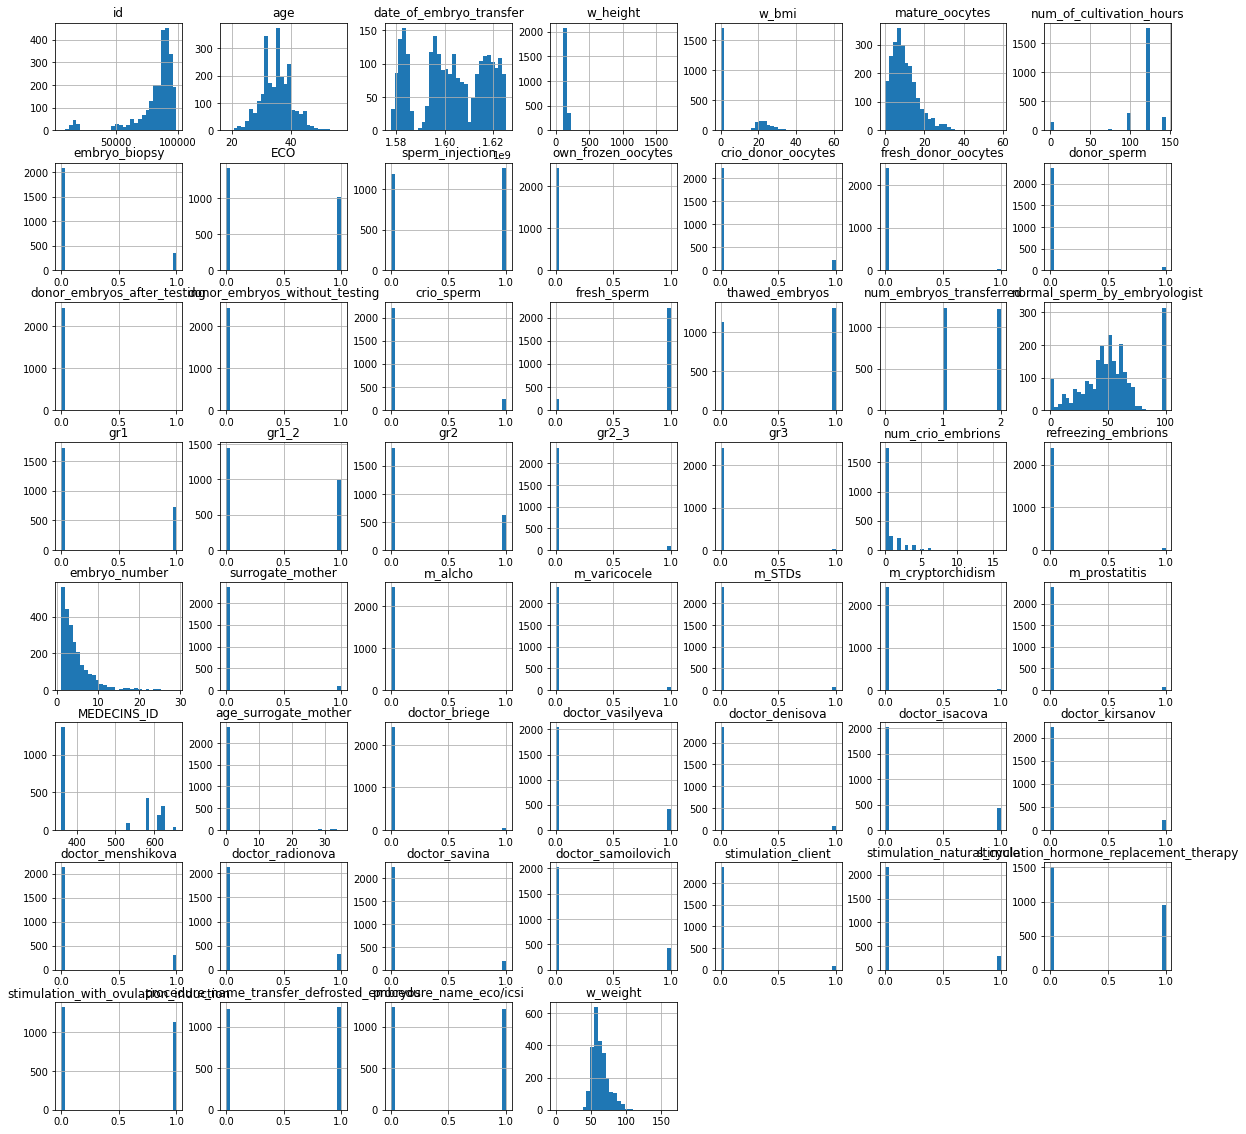

In [237]:
df.hist(bins=30, figsize=(20, 20));

In [238]:
data[list_of_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 7 to 2969
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   w_diagnosis                       2323 non-null   object 
 1   w_diagnosis_mkb                   2323 non-null   object 
 2   duration_of_infertility           1823 non-null   float64
 3   egg_collection_day_time           2402 non-null   object 
 4   number_of_eco-tries               2385 non-null   float64
 5   w_weight                          2437 non-null   float64
 6   protocol                          2264 non-null   object 
 7   gonadotropins                     2372 non-null   object 
 8   starting_dose                     2372 non-null   object 
 9   trigger                           2282 non-null   object 
 10  duration_of_ovarian_stimulation   2270 non-null   float64
 11  cycle_day_puncture                2395 non-null   float64
 12  cycle_

In [239]:
data.w_diagnosis.value_counts()

Бесплодие I._x000D_\nМужской_x000D_\nфактор.N97.4                                                                                                                                                                                                                                                                                                                                         18
Бесплодие II._x000D_\nМужской_x000D_\nфактор.N97.4                                                                                                                                                                                                                                                                                                                                        10
Бесплодие II_x000D_\nтрубное.                                                                                                                                                                                                                 

In [241]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1]

215         Бесплодие I_x000D_\nN97.4
327     Бесплодие II_x000D_\nтрубное.
328     Бесплодие II_x000D_\nтрубное.
551     Бесплодие II_x000D_\nтрубное.
552     Бесплодие II_x000D_\nтрубное.
1410      Бесплодие II_x000D_\nN 97.4
1411      Бесплодие II_x000D_\nN 97.4
2115    Бесплодие II_x000D_\nтрубное.
2116    Бесплодие II_x000D_\nтрубное.
2117    Бесплодие II_x000D_\nтрубное.
2118    Бесплодие II_x000D_\nтрубное.
2428    Бесплодие II_x000D_\nтрубное.
Name: w_diagnosis, dtype: object

In [242]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1]

8       Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...
9       Бесплодие_x000D_\nI.Первичная_x000D_\nолигомен...
12      Бесплодие_x000D_\nII.Фолликуля_x000D_\nрная ки...
13      Бесплодие_x000D_\nII.Фолликуля_x000D_\nрная ки...
14      Бесплодие I_x000D_\n(N97.1_x000D_\nженское_x00...
                              ...                        
2956    Бесплодие II._x000D_\nХронический_x000D_\nсаль...
2960    Бесплодие II._x000D_\nПривычное_x000D_\nневына...
2962    Бесплодие I_x000D_\nсложное_x000D_\n(N97.4_x00...
2967    Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...
2968    Бесплодие_x000D_\nI.Хронически_x000D_\nй_x000D...
Name: w_diagnosis, Length: 887, dtype: object

In [243]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')

/tmp/ipykernel_5478/4267495441.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')
/tmp/ipykernel_5478/4267495441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\d_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')


In [244]:
data.w_diagnosis.iloc[8]

'Бесплодие.I.Гиперпрола.ктинемия..E22.1.Мужск.ой.фактор.N97.4.(азоосперми.я).'

In [245]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')

/tmp/ipykernel_5478/117447602.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')
/tmp/ipykernel_5478/117447602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(\D_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')


In [246]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')

/tmp/ipykernel_5478/1981508870.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')
/tmp/ipykernel_5478/1981508870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1] = data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1].str.replace(r'(_x000D_\n)', '.')


In [247]:
data.w_diagnosis[data.w_diagnosis.str.count(r'(_x000D_\n)')==1]

Series([], Name: w_diagnosis, dtype: object)

In [248]:
data.w_diagnosis.iloc[215]

'Бесплодие I_x000D_\nмужской_x000D_\nфактор.'

In [249]:
data.w_diagnosis.value_counts()

Бесплодие I._x000D_\nМужской_x000D_\nфактор.N97.4                                                                                                                                                                                                                                                                                                                                         18
Бесплодие II._x000D_\nМужской_x000D_\nфактор.N97.4                                                                                                                                                                                                                                                                                                                                        10
Бесплодие II.трубное.                                                                                                                                                                                                                         

In [250]:
series = data.w_diagnosis.value_counts()

In [251]:
data.w_diagnosis.nunique()

1477

In [252]:
data.w_diagnosis[data.w_diagnosis.notnull()]= data.w_diagnosis[data.w_diagnosis.notnull()].apply(lambda x: x.lower())

/tmp/ipykernel_5478/610825383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis[data.w_diagnosis.notnull()]= data.w_diagnosis[data.w_diagnosis.notnull()].apply(lambda x: x.lower())


In [254]:
data.w_diagnosis

7                                                     NaN
8       бесплодие.i.первичная.олигоменорр.ея..n91.3.сп...
9       бесплодие.i.первичная.олигоменорр.ея..n91.3.сп...
10      бесплодие ii._x000d_\nхронический_x000d_\nсаль...
12      бесплодие.ii.фолликуля.рная киста.правого.яичн...
                              ...                        
2963    бесплодие_x000d_\ni.хронически_x000d_\nй_x000d...
2965    бесплодие_x000d_\ni.хронически_x000d_\nй_x000d...
2967    бесплодие.i.хронически.й.сальпингооф.орит..n70...
2968    бесплодие.i.хронически.й.сальпингооф.орит..n70...
2969    бесплодие ii._x000d_\nприобретенн_x000d_\nое_x...
Name: w_diagnosis, Length: 2446, dtype: object

In [256]:
data.w_diagnosis[data.w_diagnosis.notnull()].apply(lambda x: re.sub(r'[^\w\s]','', x))

8       бесплодиеiпервичнаяолигоменорреяn913спяe282ано...
9       бесплодиеiпервичнаяолигоменорреяn913спяe282ано...
10      бесплодие ii_x000d_\nхронический_x000d_\nсальп...
12      бесплодиеiiфолликулярная кистаправогояичникагэ...
13      бесплодиеiiфолликулярная кистаправогояичникагэ...
                              ...                        
2963    бесплодие_x000d_\niхронически_x000d_\nй_x000d_...
2965    бесплодие_x000d_\niхронически_x000d_\nй_x000d_...
2967    бесплодиеiхроническийсальпингоофоритn701днзe04...
2968    бесплодиеiхроническийсальпингоофоритn701днзe04...
2969    бесплодие ii_x000d_\nприобретенн_x000d_\nое_x0...
Name: w_diagnosis, Length: 2323, dtype: object

In [ ]:
data.w_diagnosis[data.w_diagnosis.notnull()]=

In [98]:
df = pd.DataFrame(zip(data.w_diagnosis.index, data.w_diagnosis.str.split(' ')))

In [99]:
df.to_csv('output.csv')

In [460]:
df = pd.read_csv('output.csv')

In [461]:
df = df.drop(columns = 'Unnamed: 0')

In [462]:
df = df.set_index('0')

In [463]:
df = df.rename({'1': 'w_diagnosis'})

In [464]:
df

,1
0,
7,NaN
8,['БесплодиеI.Первичнаяолигоменоррея.N91.3.СПЯ....
9,['БесплодиеI.Первичнаяолигоменоррея.N91.3.СПЯ....
10,"['Бесплодие', 'II.Хроническийсальпингоофорит.N..."
12,"['БесплодиеII.Фолликулярная', 'кистаправогояич..."
...,...
2963,"['БесплодиеI.Хроническийсальпингоофорит.', 'N7..."
2965,"['БесплодиеI.Хроническийсальпингоофорит.', 'N7..."
2967,['БесплодиеI.Хроническийсальпингоофорит.N70.1....


In [465]:
data = pd.merge(data, df, left_index=True, right_index=True)

In [466]:
data = data.drop(columns = 'w_diagnosis')

In [467]:
data = data.rename({'1': 'w_diagnosis'}, axis='columns')

In [468]:
data.columns

Index(['id', 'age', 'w_diagnosis_mkb', 'duration_of_infertility',
       'egg_collection_day_time', 'date_of_embryo_transfer',
       'number_of_eco-tries', 'w_height', 'w_weight', 'w_bmi', 'protocol',
       'gonadotropins', 'starting_dose ', 'trigger',
       'duration_of_ovarian_stimulation ', 'cycle_day_puncture',
       'cycle_day_transfer', 'punctuated', 'flushed', 'num_oocytes',
       'mature_oocytes', 'endometrial_thickness_mm', 'embryologist',
       'num_of_cultivation_hours', 'embryo_biopsy', 'method_embryo_biopsy',
       'ECO', 'sperm_injection', 'own_frozen_oocytes', 'crio_donor_oocytes',
       'fresh_donor_oocytes', 'donor_sperm', 'donor_embryos_after_testing',
       'donor_embryos_without_testing', 'crio_sperm', 'fresh_sperm',
       'crio_sperm_obtained_surgery', 'fresh_sperm_obtained_surgery',
       'thawed_embryos', 'num_embryos_transferred', 'ejaculate_volume_ml',
       'concen_of_round_cells', 'concen_sperm_cells', 'mobility_of_sperm_%',
       'norm_sperm_%',

In [469]:
data.head()

,id,age,w_diagnosis_mkb,duration_of_infertility,egg_collection_day_time,date_of_embryo_transfer,number_of_eco-tries,w_height,w_weight,w_bmi,...,doctor_radionova,doctor_savina,doctor_samoilovich,stimulation_client,stimulation_natural_cycle,stimulation_hormone_replacement_therapy,stimulation_with_ovulation_induction,procedure_name_transfer_defrosted_embryos,procedure_name_eco/icsi,w_diagnosis
7,73373,41.0,NaN,NaN,30.12.2019 09:00:00,1.578130e+09,1.0,167.0,63.0,0.00000,...,0,0,0,0,1,0,0,0,1,NaN
8,90239,29.0,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,1.578658e+09,1.0,160.0,80.0,31.25000,...,0,0,0,0,0,0,1,0,1,['БесплодиеI.Первичнаяолигоменоррея.N91.3.СПЯ....
9,90239,29.0,Бесплодие I.Первичная олигоменоррея._x000D_\nN...,10.0,06.01.2020 10:00:00,1.578658e+09,1.0,160.0,80.0,31.25000,...,0,0,0,0,0,0,1,0,1,['БесплодиеI.Первичнаяолигоменоррея.N91.3.СПЯ....
10,88248,46.0,Бесплодие II. Хронический_x000D_\nсальпингоофо...,2.0,08.01.2020 10:30:00,1.578917e+09,1.0,149.0,66.0,0.00000,...,0,0,0,0,0,1,0,0,1,"['Бесплодие', 'II.Хроническийсальпингоофорит.N..."
12,86497,33.0,Бесплодие II.Фолликулярная киста правого_x000D...,NaN,09.01.2020 10:00:00,1.578907e+09,1.0,168.0,87.0,30.82483,...,0,0,0,0,0,0,1,0,1,"['БесплодиеII.Фолликулярная', 'кистаправогояич..."


In [470]:
data.to_csv('data_premium.csv')

In [471]:
data = pd.read_csv('data_premium.csv')

In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2446 non-null   int64  
 1   id                                         2446 non-null   int64  
 2   age                                        2446 non-null   int64  
 3   w_diagnosis_mkb                            2323 non-null   object 
 4   duration_of_infertility                    1823 non-null   float64
 5   egg_collection_day_time                    2402 non-null   object 
 6   date_of_embryo_transfer                    2446 non-null   int64  
 7   number_of_eco-tries                        2385 non-null   float64
 8   w_height                                   2446 non-null   int64  
 9   w_weight                                   2437 non-null   float64
 10  w_bmi                   

37  crio_sperm_obtained_surgery                6 non-null      object 
42  concen_of_round_cells                      1 non-null      object 
45  norm_sperm_%                               13 non-null     float64
60  outcome_pregnancy                          0 non-null      float64
62  МАР_lgG                                    9 non-null      object
82  complications_during_pregnancy             38 non-null     object 


In [475]:
data.crio_sperm_obtained_surgery.value_counts()

Пункционная биопсия придатков, яичков,\nаспирационная (PESA, TESЕ)    6
Name: crio_sperm_obtained_surgery, dtype: int64

In [478]:
data.complications_during_pregnancy.value_counts()

гестационны\nй сахарный\nдиабет                                                                                                                                                                                                                3
ни 1\nгоспитализац\nии не было,\nвсе отлично                                                                                                                                                                                                   2
анемия\nартер\nгипертензия\nс 12 нед\nотеки с 34\nнед                                                                                                                                                                                          2
КОВИД,\nлегкое\nтечение при\nсроке 31 нед\nбеременност\nи - ИЦН -\nАРП,\nмноговодие.                                                                                                                                                           2
умеренная\nпреэклампси\nя,\nжелезоде

In [476]:
data.concen_of_round_cells.value_counts()

1-2    1
Name: concen_of_round_cells, dtype: int64

In [477]:
data.МАР_lgG.value_counts()

<5%    6
2%     2
7%     1
Name: МАР_lgG, dtype: int64

In [479]:
data = data.drop(columns = ['norm_sperm_%','outcome_pregnancy','concen_of_round_cells'])

In [480]:
 data.outcome_treatment.value_counts()

Беременность не наступила            1272
Беременность клиническая             1118
Биохимическая беременность             37
Нет данных                              7
CryoET по ОМС                           2
Снята с цикла                           1
Перенос эмбрионов не производился       1
Name: outcome_treatment, dtype: int64

In [481]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2446 non-null   int64  
 1   id                                         2446 non-null   int64  
 2   age                                        2446 non-null   int64  
 3   w_diagnosis_mkb                            2323 non-null   object 
 4   duration_of_infertility                    1823 non-null   float64
 5   egg_collection_day_time                    2402 non-null   object 
 6   date_of_embryo_transfer                    2446 non-null   int64  
 7   number_of_eco-tries                        2385 non-null   float64
 8   w_height                                   2446 non-null   int64  
 9   w_weight                                   2437 non-null   float64
 10  w_bmi                   

In [482]:
data.w_diagnosis_mkb.value_counts()

Бесплодие II (N97.1 женское бесплодие\nтрубно-перитонеальное). Хронический\nсальпингоофорит (N70.1),     26
Бесплодие I. Мужской фактор.N97.4                                                                        12
Бесплодие II. Хронический\nсальпингоофорит. N70.1.Приобретенное\nотсутствие органа (2-сторонняя тубэк    10
Бесплодие I (N97.1 женское бесплодие\nтрубно-перитонеальное). Хронический\nсальпингоофорит (N70.1), р    10
Бесплодие II трубное.                                                                                     9
                                                                                                         ..
Бесплодие I сочетанное (N97.8 женское\nбесплодие, обусловленное наружным\nгенитальным эндометриозом +     1
Бесплодие I (N97.1 женское\nтрубгно-перитонеальное). Хронический\nсальпингоофорит (N70.1), ремиссия.      1
Бесплодие II. Хронический\nсальпингоофорит. N70.1.Миома матки.\nD25.Спаечный процесс в малом тазу. N9     1
Бесплодие I, трубно-перитоне

In [495]:
list_of_index_II = data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие II)')==1].index

In [488]:
list_of_index_I = data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие I\W)')==1].index

In [491]:
data['type_of_infertility'] = 0

In [493]:
data['type_of_infertility'].iloc[list_of_index_I] = 1

/tmp/ipykernel_5638/374932832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[list_of_index_I] = 1


In [494]:
data['type_of_infertility'].iloc[list_of_index_I]

1       1
2       1
6       1
7       1
8       1
       ..
2440    1
2441    1
2442    1
2443    1
2444    1
Name: type_of_infertility, Length: 1066, dtype: int64

In [496]:
data['type_of_infertility'].iloc[list_of_index_II] = 2

/tmp/ipykernel_5638/3656330123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[list_of_index_II] = 2


In [497]:
data['type_of_infertility'].value_counts()

2    1182
1    1066
0     198
Name: type_of_infertility, dtype: int64

In [508]:
data.w_diagnosis_mkb[data.type_of_infertility == 0].isnull()

0        True
9       False
145      True
150      True
320     False
        ...  
2414    False
2415     True
2416     True
2429     True
2430     True
Name: w_diagnosis_mkb, Length: 198, dtype: bool

In [509]:
len(data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие вторичное)')==1].index)

16

In [518]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие вторичное)')==1].index] = 2

/tmp/ipykernel_5638/2923356166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие вторичное)')==1].index] = 2


In [510]:
len(data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Вторичное бесплодие)')==1].index)

2

In [519]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Вторичное бесплодие)')==1].index] = 2

/tmp/ipykernel_5638/2475204317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Вторичное бесплодие)')==1].index] = 2


In [511]:
len(data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 2)')==1].index)

11

In [520]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 2)')==1].index] = 2

/tmp/ipykernel_5638/3652187685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 2)')==1].index] = 2


In [512]:
len(data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 1)')==1].index)

8

In [521]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 1)')==1].index] = 1

/tmp/ipykernel_5638/1086863846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие 1)')==1].index] = 1


In [513]:
len(data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие1)')==1].index)

1

In [522]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие1)')==1].index] = 1

/tmp/ipykernel_5638/75494109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие1)')==1].index] = 1


In [506]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие2)')==1].index

Int64Index([], dtype='int64')

In [515]:
198 - 16 -2 - 11 -8 -1 - (2446-2323)

37

In [525]:
data.w_diagnosis_mkb[(data.type_of_infertility == 0) & (data.w_diagnosis_mkb.notnull())]

502     Снижение овариального резерва.\nГипер/нормогон...
610     Бесплодие первичное\nБесплодие первичное\nНГЭ ...
623                        Плнирование беременности с ДС.
624                        Плнирование беременности с ДС.
738     Планирование беременности с ДС.\nПоздний репро...
872     Женское бесплодие, связанное с\nмужскими факто...
984     Бесплодие первичное. Поздний\nрепродуктивный в...
1039    Планирование беременности.Миома матки.\nD25.ОГ...
1040    Планирование беременности.Миома матки.\nD25.ОГ...
1158    НГЭ 4 ст в анамнезе, хр. сальпингоофорит.\nСпа...
1252    Женское бесплодие, связанное с\nмужскими факто...
1254    Женское бесплодие II сочетанное (N97.1\nтрубно...
1262    Первичное бесплодие. Аднексэктомия\nсправа (20...
1558    Женское бесплодие (вторичное) трубного\nпорисх...
1579    Женское бесплодие I, связанное с\nмужским факт...
1612    Женское бесплодие (первичное) трубного\nпроисх...
1627    Привычное невынашивание беременности.\nN96. Пр...
1677    Привыч

In [526]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие первичное)')==1].index] = 1

/tmp/ipykernel_5638/1586710951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие первичное)')==1].index] = 1


In [528]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие II)')==1].index] = 2

/tmp/ipykernel_5638/772143324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие II)')==1].index] = 2


In [529]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (вторичное))')==1].index] = 2

/tmp/ipykernel_5638/2585645963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (вторичное))')==1].index] = 2


502     Снижение овариального резерва.\nГипер/нормогон...
610     Бесплодие первичное\nБесплодие первичное\nНГЭ ...
623                        Плнирование беременности с ДС.
624                        Плнирование беременности с ДС.
738     Планирование беременности с ДС.\nПоздний репро...
872     Женское бесплодие, связанное с\nмужскими факто...
984     
1039    Планирование беременности.Миома матки.\nD25.ОГ...
1040    Планирование беременности.Миома матки.\nD25.ОГ...
1158    НГЭ 4 ст в анамнезе, хр. сальпингоофорит.\nСпа...
1252    Женское бесплодие, связанное с\nмужскими факто...
1254    
1262    Первичное бесплодие. Аднексэктомия\nсправа (20...
1558    
1579    
1612    
1627    Привычное невынашивание беременности.\nN96. Пр...
1677    Привычное невынашивание беременности.\nN96Аден...
1723    
1744    Привычное невынашивание беременности.\nN96 Хро...
1805    Бесплодие. Хронический сальпингоофорит.\nN70.1...
1810    Привычное невынашивание беременности.\nN96 Аде...
1912    Бесплодие первичное, обусловленное\nмужским фа...
1922    Планирование беременности. Неполное\nудвоение ...
1977    Привычное невынашивание беременности.\nN96 .Му...
2042    Привычное невынашивание беременности.\nПоздний...
2043    Привычное невынашивание беременности.\nПоздний...
2112    Бесплодие первичное, трубное.\nДвусторонняя ту...
2113    Бесплодие первичное, трубное.\nДвусторонняя ту...
2212    Бесплодие  (комбинированное). Мужской\nфактор....
2213    Бесплодие  (комбинированное). Мужской\nфактор....
2273    Cостояние после ОС. Бесплодие\nI.Первичная оли...
2291    Поздний репродуктивный возраст. Миома\nматки. ...
2307    Планирование беременности методом\nЭКО+ПГТа. Н...
2341                Привычное невынашивание беременности.
2342                Привычное невынашивание беременности.
2406     Планирование беременности с помощью\nЭКО + ПГТ-А

In [530]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие I)')==1].index] = 1
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (первичное))')==1].index] = 1
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(бесплодие II)')==1].index] = 2
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие первичное)')==1].index] = 1


/tmp/ipykernel_5638/1115135137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие I)')==1].index] = 1
/tmp/ipykernel_5638/1115135137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (первичное))')==1].index] = 1
/tmp/ipykernel_5638/1115135137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [531]:
data.w_diagnosis_mkb[(data.type_of_infertility == 0) & (data.w_diagnosis_mkb.notnull())]

502     Снижение овариального резерва.\nГипер/нормогон...
610     Бесплодие первичное\nБесплодие первичное\nНГЭ ...
623                        Плнирование беременности с ДС.
624                        Плнирование беременности с ДС.
738     Планирование беременности с ДС.\nПоздний репро...
872     Женское бесплодие, связанное с\nмужскими факто...
1039    Планирование беременности.Миома матки.\nD25.ОГ...
1040    Планирование беременности.Миома матки.\nD25.ОГ...
1158    НГЭ 4 ст в анамнезе, хр. сальпингоофорит.\nСпа...
1252    Женское бесплодие, связанное с\nмужскими факто...
1262    Первичное бесплодие. Аднексэктомия\nсправа (20...
1558    Женское бесплодие (вторичное) трубного\nпорисх...
1612    Женское бесплодие (первичное) трубного\nпроисх...
1627    Привычное невынашивание беременности.\nN96. Пр...
1677    Привычное невынашивание беременности.\nN96Аден...
1744    Привычное невынашивание беременности.\nN96 Хро...
1805    Бесплодие. Хронический сальпингоофорит.\nN70.1...
1810    Привыч

In [532]:
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие первичное\n)')==1].index] = 1
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Первичное бесплодие.)')==1].index] = 1
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (вторичное))')==1].index] = 2
data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Женское бесплодие (первичное))')==1].index] = 1

/tmp/ipykernel_5638/2347066866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Бесплодие первичное\n)')==1].index] = 1
/tmp/ipykernel_5638/2347066866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[data.w_diagnosis_mkb[data.w_diagnosis_mkb.str.count(r'(Первичное бесплодие.)')==1].index] = 1
/tmp/ipykernel_5638/2347066866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [533]:
data.w_diagnosis_mkb[(data.type_of_infertility == 0) & (data.w_diagnosis_mkb.notnull())]

502     Снижение овариального резерва.\nГипер/нормогон...
610     Бесплодие первичное\nБесплодие первичное\nНГЭ ...
623                        Плнирование беременности с ДС.
624                        Плнирование беременности с ДС.
738     Планирование беременности с ДС.\nПоздний репро...
872     Женское бесплодие, связанное с\nмужскими факто...
1039    Планирование беременности.Миома матки.\nD25.ОГ...
1040    Планирование беременности.Миома матки.\nD25.ОГ...
1158    НГЭ 4 ст в анамнезе, хр. сальпингоофорит.\nСпа...
1252    Женское бесплодие, связанное с\nмужскими факто...
1558    Женское бесплодие (вторичное) трубного\nпорисх...
1612    Женское бесплодие (первичное) трубного\nпроисх...
1627    Привычное невынашивание беременности.\nN96. Пр...
1677    Привычное невынашивание беременности.\nN96Аден...
1744    Привычное невынашивание беременности.\nN96 Хро...
1805    Бесплодие. Хронический сальпингоофорит.\nN70.1...
1810    Привычное невынашивание беременности.\nN96 Аде...
1922    Планир

In [535]:
data['type_of_infertility'].iloc[1558] = 2
data['type_of_infertility'].iloc[1612] = 1

/tmp/ipykernel_5638/760397541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[1558] = 2
/tmp/ipykernel_5638/760397541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_infertility'].iloc[1612] = 1


<AxesSubplot:>

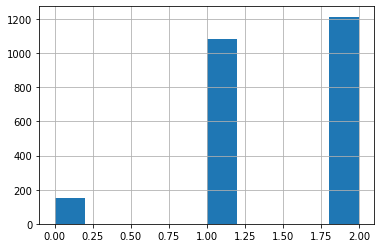

In [536]:
data['type_of_infertility'].hist()

In [537]:
s = 'Планирование беременности.Миома матки.\nD25.ОГ'

In [539]:
s.lower()

'планирование беременности.миома матки.\nd25.ог'

In [541]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()]

1       Бесплодие I.Первичная олигоменоррея.\nN91.3.СП...
2       Бесплодие I.Первичная олигоменоррея.\nN91.3.СП...
3       Бесплодие II. Хронический\nсальпингоофорит. N7...
4       Бесплодие II.Фолликулярная киста правого\nяичн...
5       Бесплодие II.Фолликулярная киста правого\nяичн...
                              ...                        
2441    Бесплодие I.Хронический\nсальпингоофорит. N70....
2442    Бесплодие I.Хронический\nсальпингоофорит. N70....
2443    Бесплодие I.Хронический\nсальпингоофорит. N70....
2444    Бесплодие I.Хронический\nсальпингоофорит. N70....
2445    Бесплодие II. Приобретенное отсутствие\nоргана...
Name: w_diagnosis_mkb, Length: 2323, dtype: object

In [542]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()]= data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()].apply(lambda x: x.lower())

/tmp/ipykernel_5638/3752462369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()]= data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()].apply(lambda x: x.lower())


In [543]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()]

1       бесплодие i.первичная олигоменоррея.\nn91.3.сп...
2       бесплодие i.первичная олигоменоррея.\nn91.3.сп...
3       бесплодие ii. хронический\nсальпингоофорит. n7...
4       бесплодие ii.фолликулярная киста правого\nяичн...
5       бесплодие ii.фолликулярная киста правого\nяичн...
                              ...                        
2441    бесплодие i.хронический\nсальпингоофорит. n70....
2442    бесплодие i.хронический\nсальпингоофорит. n70....
2443    бесплодие i.хронический\nсальпингоофорит. n70....
2444    бесплодие i.хронический\nсальпингоофорит. n70....
2445    бесплодие ii. приобретенное отсутствие\nоргана...
Name: w_diagnosis_mkb, Length: 2323, dtype: object

In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2446 non-null   int64  
 1   id                                         2446 non-null   int64  
 2   age                                        2446 non-null   int64  
 3   w_diagnosis_mkb                            2323 non-null   object 
 4   duration_of_infertility                    1823 non-null   float64
 5   egg_collection_day_time                    2402 non-null   object 
 6   date_of_embryo_transfer                    2446 non-null   int64  
 7   number_of_eco-tries                        2385 non-null   float64
 8   w_height                                   2446 non-null   int64  
 9   w_weight                                   2437 non-null   float64
 10  w_bmi                   

In [ ]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()]= data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()].apply(lambda x: x.lower())

In [545]:
data.w_diagnosis[data.w_diagnosis.notnull()]= data.w_diagnosis[data.w_diagnosis.notnull()].apply(lambda x: x.lower())

/tmp/ipykernel_5638/610825383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.w_diagnosis[data.w_diagnosis.notnull()]= data.w_diagnosis[data.w_diagnosis.notnull()].apply(lambda x: x.lower())


In [546]:
data.egg_collection_day_time

0       30.12.2019 09:00:00
1       06.01.2020 10:00:00
2       06.01.2020 10:00:00
3       08.01.2020 10:30:00
4       09.01.2020 10:00:00
               ...         
2441                    NaN
2442                    NaN
2443    28.04.2021 11:30:00
2444    28.04.2021 11:30:00
2445    10.05.2021 11:27:26
Name: egg_collection_day_time, Length: 2446, dtype: object

In [549]:
data.egg_collection_day_time[data.egg_collection_day_time == '12.09.2012']

1134    12.09.2012
Name: egg_collection_day_time, dtype: object

In [562]:
data.egg_collection_day_time[data.egg_collection_day_time == '08.05.2013']

1135    08.05.2013
Name: egg_collection_day_time, dtype: object

In [563]:
data.egg_collection_day_time.iloc[1135:1137]

1135             08.05.2013
1136             05.08.2013
1137             05.08.2013
1138    03.03.2014 11:30:00
1139    03.03.2014 11:30:00
               ...         
2441                    NaN
2442                    NaN
2443    28.04.2021 11:30:00
2444    28.04.2021 11:30:00
2445    10.05.2021 11:27:26
Name: egg_collection_day_time, Length: 1311, dtype: object

In [564]:
data.egg_collection_day_time.iloc[1135] = '08.05.2013 0:00:00'
data.egg_collection_day_time.iloc[1136] = '05.08.2013 0:00:00'
data.egg_collection_day_time.iloc[1137] = '05.08.2013 0:00:00'

/tmp/ipykernel_5638/1958946402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.egg_collection_day_time.iloc[1135] = '08.05.2013 0:00:00'
/tmp/ipykernel_5638/1958946402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.egg_collection_day_time.iloc[1136] = '05.08.2013 0:00:00'
/tmp/ipykernel_5638/1958946402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.egg_collection_day_time.iloc[1137] = '05.08.2013 0:00:00'


In [550]:
data.egg_collection_day_time.iloc[1134] = '12.09.2012 0:00:00'

/tmp/ipykernel_5638/1880753042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.egg_collection_day_time.iloc[1134] = '12.09.2012 0:00:00'


In [568]:
data.egg_collection_day_time[data.egg_collection_day_time.notnull()] = data.egg_collection_day_time[data.egg_collection_day_time.notnull()].apply(lambda x: time_time(x))

/tmp/ipykernel_5638/2215260111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.egg_collection_day_time[data.egg_collection_day_time.notnull()] = data.egg_collection_day_time[data.egg_collection_day_time.notnull()].apply(lambda x: time_time(x))


In [566]:
def time_time(x):
    try:
        result = time.mktime(datetime.datetime.strptime(x, "%d.%m.%Y  %H:%M:%S").timetuple())
    except:
        result = time.mktime(datetime.datetime.strptime(x, "%d.%m.%Y").timetuple())
    return result

In [570]:
data.egg_collection_day_time.value_counts()

1.598422e+09    6
1.595056e+09    6
1.572331e+09    5
1.578469e+09    5
1.594451e+09    5
               ..
1.618209e+09    1
1.618385e+09    1
1.618558e+09    1
1.618218e+09    1
1.620635e+09    1
Name: egg_collection_day_time, Length: 1531, dtype: int64

In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2446 non-null   int64  
 1   id                                         2446 non-null   int64  
 2   age                                        2446 non-null   int64  
 3   w_diagnosis_mkb                            2323 non-null   object 
 4   duration_of_infertility                    1823 non-null   float64
 5   egg_collection_day_time                    2402 non-null   object 
 6   date_of_embryo_transfer                    2446 non-null   int64  
 7   number_of_eco-tries                        2385 non-null   float64
 8   w_height                                   2446 non-null   int64  
 9   w_weight                                   2437 non-null   float64
 10  w_bmi                   

protocol                                   2264 non-null   object 
 12  gonadotropins                              2372 non-null   object 
 13  starting_dose                              2372 non-null   object 
 14  trigger                                    2282 non-null   object 

In [572]:
data.protocol.value_counts()

АНТ    1897
КП      111
ДЛ       93
СО       85
КЛЦ      45
ЗГТ      17
ЕЦ       12
МЕЦ       3
СДЛ       1
Name: protocol, dtype: int64

In [577]:
data.gonadotropins.value_counts()

Гонал Ф         1252
Менопур          534
Пурегон          317
МЕНОПУР 1200     111
Перговерис        90
МЕНОПУР           68
Name: gonadotropins, dtype: int64

In [576]:
data['starting_dose '].value_counts()

150       840
225       595
200       438
300        96
175        94
75         74
100        73
2          46
1          39
250        17
4          11
187.5      10
3          10
375         6
5           5
125         5
50          3
0.25        2
200 IU      2
15          2
22          2
150 IU      1
100 IU      1
Name: starting_dose , dtype: int64

In [574]:
data.trigger.value_counts()

ОВИТРЕЛЬ                          1157
Декапептил, мг                     640
хорионический гонадотропин, МЕ     415
гонадотропин хорионический, МЕ      70
Name: trigger, dtype: int64

In [575]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'w_diagnosis_mkb', 'duration_of_infertility',
       'egg_collection_day_time', 'date_of_embryo_transfer',
       'number_of_eco-tries', 'w_height', 'w_weight', 'w_bmi', 'protocol',
       'gonadotropins', 'starting_dose ', 'trigger',
       'duration_of_ovarian_stimulation ', 'cycle_day_puncture',
       'cycle_day_transfer', 'punctuated', 'flushed', 'num_oocytes',
       'mature_oocytes', 'endometrial_thickness_mm', 'embryologist',
       'num_of_cultivation_hours', 'embryo_biopsy', 'method_embryo_biopsy',
       'ECO', 'sperm_injection', 'own_frozen_oocytes', 'crio_donor_oocytes',
       'fresh_donor_oocytes', 'donor_sperm', 'donor_embryos_after_testing',
       'donor_embryos_without_testing', 'crio_sperm', 'fresh_sperm',
       'crio_sperm_obtained_surgery', 'fresh_sperm_obtained_surgery',
       'thawed_embryos', 'num_embryos_transferred', 'ejaculate_volume_ml',
       'concen_sperm_cells', 'mobility_of_sperm_%', 'anomal_sperm_%',
       'normal_

In [578]:
data.to_csv('showing_data.csv')

In [579]:
data.embryologist.value_counts()

Панина        652
Невская       570
Леонтьева     454
Решетников    289
Пастухова     273
Бичевая       147
Абдильдин      47
Name: embryologist, dtype: int64